In [1]:
from tqdm import tqdm
import numpy as np
import torch
import collections
import random
from energy_manager_system import *
import copy

c:\Users\Can\anaconda3\envs\City\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
import local_energy_market_environment as leme

random.seed(1)
torch.manual_seed(1)

In [3]:
env = leme.LEME()

In [4]:
actor_lr = 5e-5
critic_lr = 1e-4
num_episodes = 20000

hidden_dim = 256
hidden_dim2 = 128

gamma = 0.98
lmbda = 0.95
epochs = 10
eps = 0.2
device = torch.device("cuda") if torch.cuda.is_available() else torch.device(
    "cpu")

In [5]:
state_dim = 41
action_dim = 3
action_dis_dim = 2 

In [6]:
# def __init__(self, state_dim, hidden_dim, hidden_dim2, action_dim,action_dis_dim, actor_lr, critic_lr,
                #  lmbda, epochs, eps, gamma, device):
agent = PPOContinuous(state_dim, hidden_dim,hidden_dim2, action_dim,action_dis_dim, actor_lr, critic_lr,
                      lmbda, epochs, eps, gamma, device)

In [7]:
return_list = []
L_cost =[]
L_penalty_commuting=[]
L_penalty_thermal =[]

for i in range(10):
    with tqdm(total=int(num_episodes / 10), desc='Iteration %d' % i) as pbar:
        for i_episode in range(int(num_episodes / 10)):

            episode_return = 0
            episode_cost = 0
            episode_penalty_commuting = 0
            episode_penalty_thermal = 0

            transition_dict = {'states': [], 'actions': [],'actions_dis':[], 'next_states': [], 'rewards': [], 'dones': []}
            # 到时候要修改
            state = env.reset()
            state = state
            
            done = False
            while not done:
                action,action_dis = agent.take_action(state[0])

                all_action = copy.deepcopy(action)
                all_action.append(action_dis)
                all_action = [all_action]

                # 到时候要修改
                # _state ,L_reward, done , L_cost,L_penalty_commuting,L_penalty_thermal
                next_state, reward, done, cost,penalty_commuting,penalty_thermal = env.step(all_action)

                transition_dict['states'].append(state[0])
                transition_dict['actions'].append(action)
                transition_dict['actions_dis'].append(action_dis)
                transition_dict['next_states'].append(next_state[0])
                transition_dict['rewards'].append(reward[0])
                transition_dict['dones'].append(done)

                state = next_state

                episode_return += reward[0]
                episode_cost += cost[0]
                episode_penalty_commuting += penalty_commuting[0]
                episode_penalty_thermal += penalty_thermal[0]



            return_list.append(episode_return)
            L_cost.append(episode_cost)
            L_penalty_commuting.append(episode_penalty_commuting)
            L_penalty_thermal.append(episode_penalty_thermal)
            
            agent.update(transition_dict)

            if (i_episode + 1) % 10 == 0:
                pbar.set_postfix({'episode': '%d' % (num_episodes / 10 * i + i_episode + 1),
                                    'return': '%.3f' % np.mean(return_list[-10:])})
            pbar.update(1)


Iteration 0:   0%|          | 0/2000 [00:00<?, ?it/s]c:\Users\Can\Desktop\Citylearn\our_environment\LEMEnvironment\rl_utils.py:96: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at C:\cb\pytorch_1000000000000\work\torch\csrc\utils\tensor_new.cpp:233.)
  return torch.tensor(advantage_list, dtype=torch.float)
Iteration 9: 100%|██████████| 2000/2000 [03:13<00:00, 10.33it/s, episode=20000, return=-50.475]


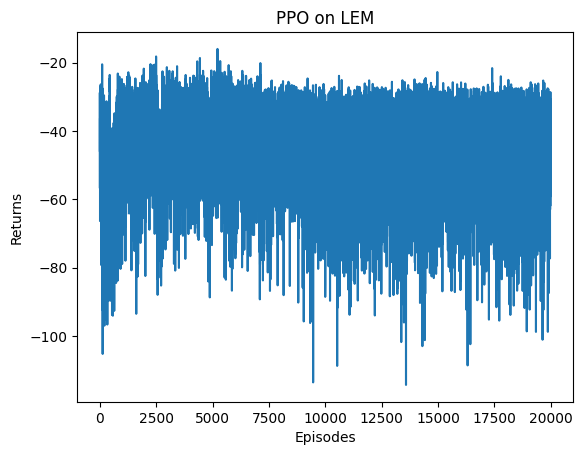

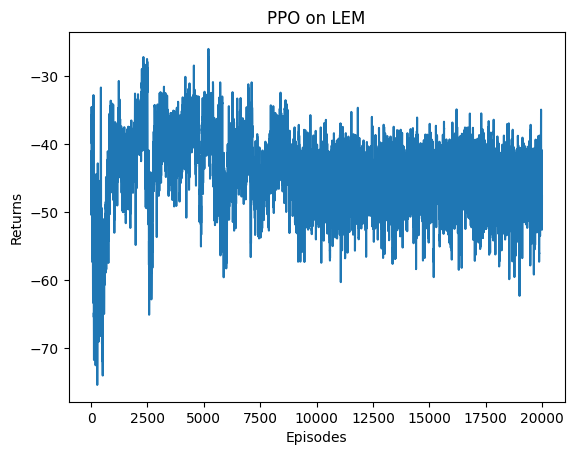

In [8]:
import matplotlib.pyplot as plt
episodes_list = list(range(len(return_list)))
plt.plot(episodes_list, return_list)
plt.xlabel('Episodes')
plt.ylabel('Returns')
plt.title('PPO on {}'.format('LEM'))
plt.show()

mv_return = rl_utils.moving_average(return_list, 9)
plt.plot(episodes_list, mv_return)
plt.xlabel('Episodes')
plt.ylabel('Returns')
plt.title('PPO on {}'.format('LEM'))
plt.show()

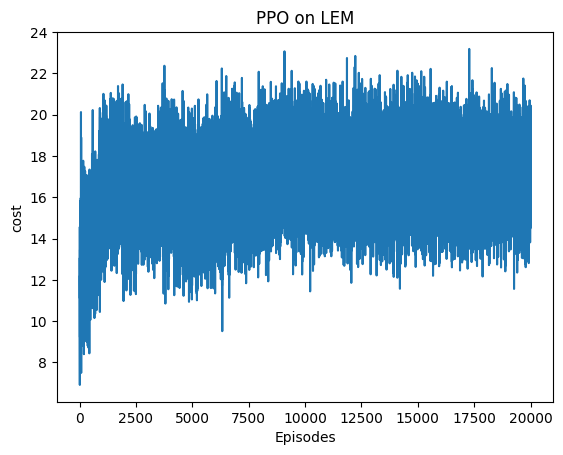

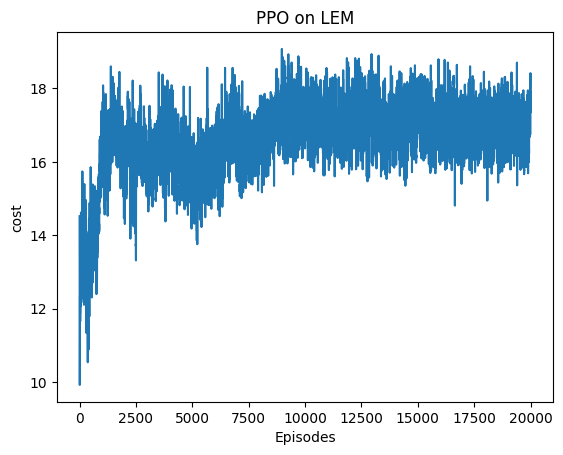

In [9]:


episodes_list = list(range(len(L_cost)))
plt.plot(episodes_list, L_cost)
plt.xlabel('Episodes')
plt.ylabel('cost')
plt.title('PPO on {}'.format('LEM'))
plt.show()

mv_return = rl_utils.moving_average(L_cost, 9)
plt.plot(episodes_list, mv_return)
plt.xlabel('Episodes')
plt.ylabel('cost')
plt.title('PPO on {}'.format('LEM'))
plt.show()

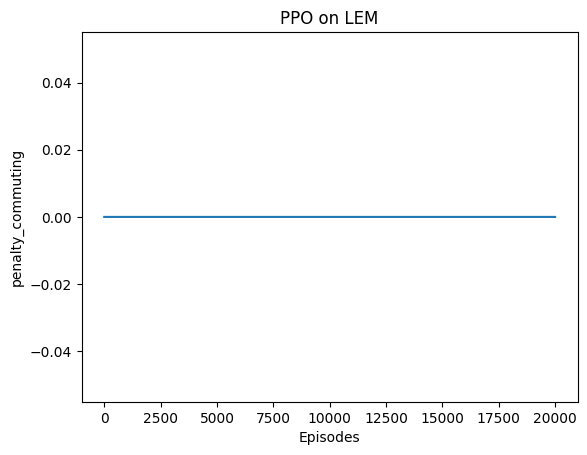

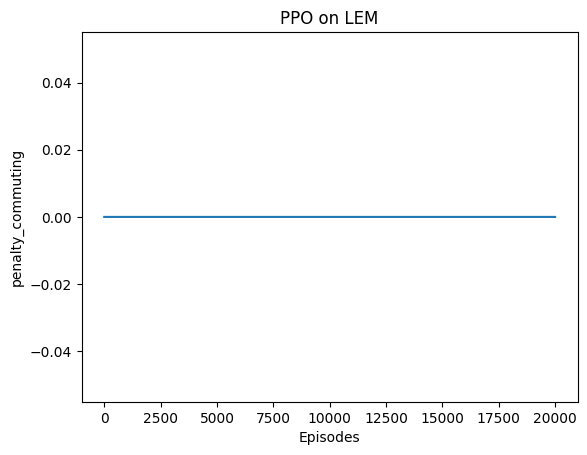

In [10]:
episodes_list = list(range(len(L_penalty_commuting)))
plt.plot(episodes_list, L_penalty_commuting)
plt.xlabel('Episodes')
plt.ylabel('penalty_commuting')
plt.title('PPO on {}'.format('LEM'))
plt.show()

mv_return = rl_utils.moving_average(L_penalty_commuting, 9)
plt.plot(episodes_list, mv_return)
plt.xlabel('Episodes')
plt.ylabel('penalty_commuting')
plt.title('PPO on {}'.format('LEM'))
plt.show()

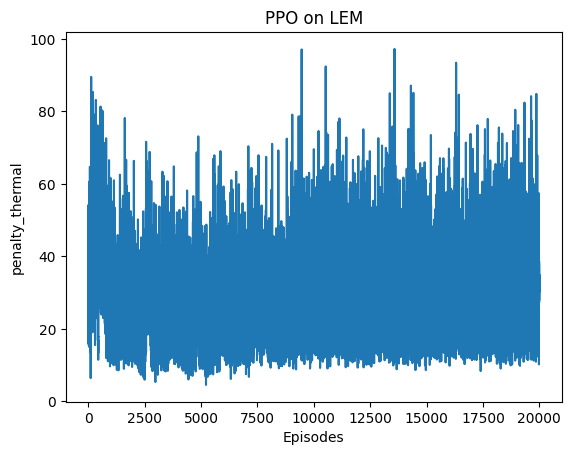

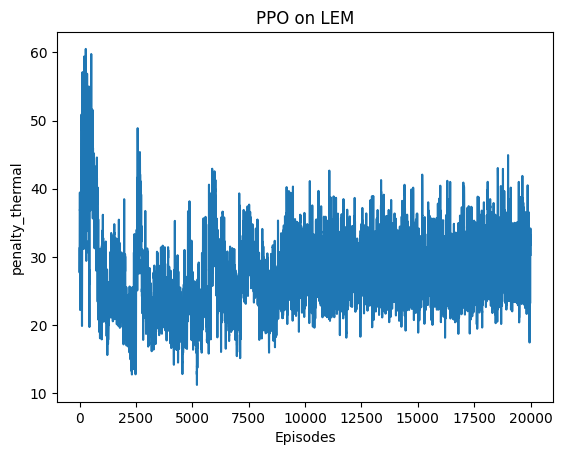

In [11]:
episodes_list = list(range(len(L_penalty_thermal)))
plt.plot(episodes_list, L_penalty_thermal)
plt.xlabel('Episodes')
plt.ylabel('penalty_thermal')
plt.title('PPO on {}'.format('LEM'))
plt.show()

mv_return = rl_utils.moving_average(L_penalty_thermal, 9)
plt.plot(episodes_list, mv_return)
plt.xlabel('Episodes')
plt.ylabel('penalty_thermal')
plt.title('PPO on {}'.format('LEM'))
plt.show()